# Kaggle Titanic Dataset

## 데이터 세부사항 (Data Description)

passengerid: 탑승자 아이디  
survived:0=사망, 1=생존  
pclass: 1=1등석, 2=2등석, 3=3등석  
name: 탑승자 이름  
gender:male=남성, female=여성  
age: 나이  
sibsp: 타이타닉 호에 동승한 자매/배우자의 수  
parch: 타이타닉 호에 동승한 부모/자식의 수  
ticket: 티켓 번호  
fare: 승객 요금  
cabin: 방 호수  
embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴  

# 전역 변수 설정 (Global Variables)

## import library

In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## path

In [5]:
import easydict
import json
args = easydict.EasyDict()

# Dataset 기본 디렉토리 경로 설정
args.default_path = '/Users/jhnam/workspace/playdata/encore21titanic/'

# get train and test dataset path
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'

# get submission path
args.submission_csv = args.default_path+"submission.csv"

# 데이터 분석을 위한 변수들
# random state
args.random_state = 21

# 데이터 불러오기 (Load Titanic Dataset)

In [14]:
org_train = pd.read_csv(args.train_csv)
org_test = pd.read_csv(args.test_csv)

##### train

In [15]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


##### test

In [16]:
org_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   pclass       393 non-null    int64  
 2   name         393 non-null    object 
 3   gender       393 non-null    object 
 4   age          310 non-null    float64
 5   sibsp        393 non-null    int64  
 6   parch        393 non-null    int64  
 7   ticket       393 non-null    object 
 8   fare         392 non-null    float64
 9   cabin        97 non-null     object 
 10  embarked     392 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 33.9+ KB


##### passengerid 중복 확인

- passengerid 의 중복값이 없는 것 확인

In [17]:
org_train['passengerid'].nunique(), org_train.shape[0]

(916, 916)

##### drop passengerid

In [18]:
org_train.drop('passengerid', axis=1, inplace=True)
org_train.shape

(916, 11)

##### set index passengerid to org_test

In [19]:
org_test.set_index(['passengerid'], inplace=True)
org_test.shape

(393, 10)

# 타겟 데이터 확인

## survived

In [20]:
target = pd.Categorical(org_train['survived'])
target = target.rename_categories(['Died', 'Survived'])

target.describe()

,counts,freqs
categories,,
Died,570,0.622271
Survived,346,0.377729


죽은 사람과 산 사람의 비율이 대략 2:1 인 것을 확인할 수 있다.

# EDA

## 데이터 확인

In [21]:
org_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [22]:
org_test.head()

,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


## 수치형 데이터 분석

### 수치형 데이터 확인

In [37]:
df_number = org_train.select_dtypes(include=np.number)
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  916 non-null    int64  
 1   pclass    916 non-null    int64  
 2   age       736 non-null    float64
 3   sibsp     916 non-null    int64  
 4   parch     916 non-null    int64  
 5   fare      916 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 43.1 KB


In [38]:
df_number.head()

,survived,pclass,age,sibsp,parch,fare
0,0,2,NaN,0,0,12.8750
1,0,3,NaN,0,0,7.7500
2,1,1,52.0,1,1,93.5000
3,1,3,27.0,0,0,7.7958
4,0,2,44.0,1,0,26.0000


### 통계적 분석

In [39]:
df_number.describe()

,survived,pclass,age,sibsp,parch,fare
count,916.000000,916.000000,736.000000,916.000000,916.000000,916.000000
mean,0.377729,2.292576,29.698370,0.507642,0.361354,32.402710
std,0.485084,0.838675,14.185627,1.044866,0.828054,50.506411
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.017700
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### age

In [55]:
print("** df_number - age 통계적 분석 **")

print(f"총 합계 : {df_number['age'].sum()}")
print(f"평균 : {df_number['age'].mean()}")
print(f"중앙값 : {df_number['age'].median()}")
print(f"분산 : {df_number['age'].var()}")
print(f"표준편차 : {df_number['age'].std()}")
print(f"최솟값 : {df_number['age'].min()}")
print(f"최댓값 : {df_number['age'].max()}")
print(f"분위수 계산\n{df_number['age'].quantile([0.25, 0.5, 0.75])}")

** df_number - age 통계적 분석 **
총 합계 : 21858.0
평균 : 29.69836956521739
중앙값 : 28.0
분산 : 201.23202237207926
표준편차 : 14.185627316833022
최솟값 : 0.17
최댓값 : 80.0
분위수 계산
0.25    21.0
0.50    28.0
0.75    38.0
Name: age, dtype: float64


### 왜도 분석

#### fare

In [57]:
# 첨도 분석
df_number['fare'].kurt()

31.16578434563386

<Axes: ylabel='Frequency'>

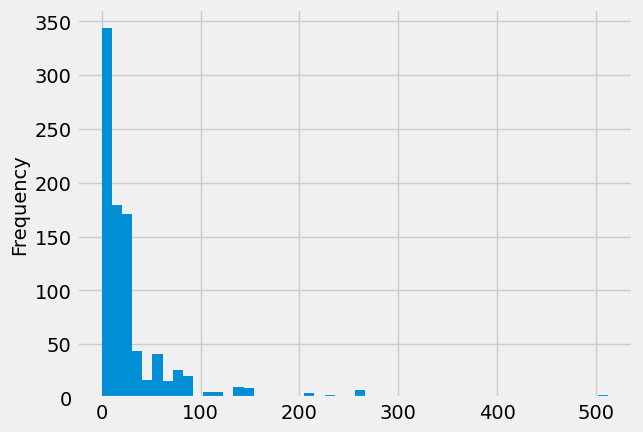

In [58]:
df_number['fare'].plot.hist(bins=50)

<Axes: >

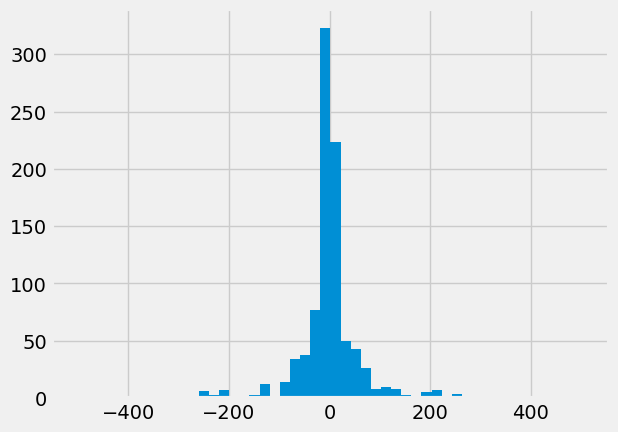

In [60]:
# diff(): 한 객체 내에서 열과 열 / 행과 행의 차이를 출력하는 메서드 입니다.
df_number['fare'].diff().hist(bins=50)

### 첨도 분석

##### fare

In [64]:
df_number['fare'].mean(), df_number['fare'].median(), df_number['fare'].mode().values[0]

(32.40271048034934, 14.4583, 13.0)

<Axes: ylabel='Frequency'>

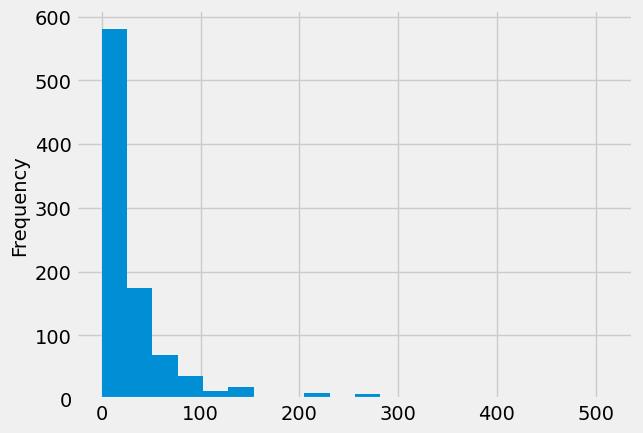

In [65]:
df_number['fare'].plot.hist(bins=20)

<Axes: >

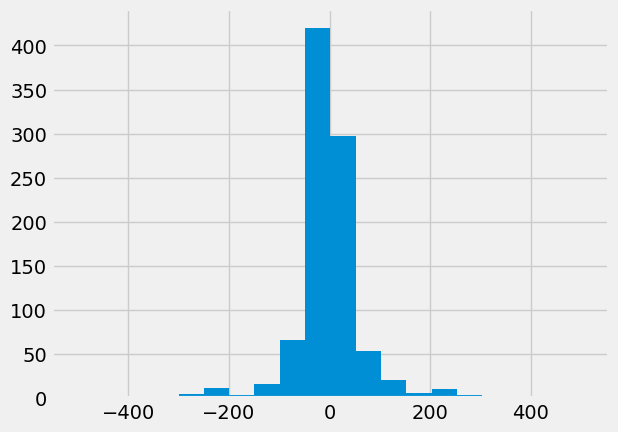

In [66]:
df_number['fare'].diff().hist(bins=20)

### 이상치 분석

<Axes: ylabel='age'>

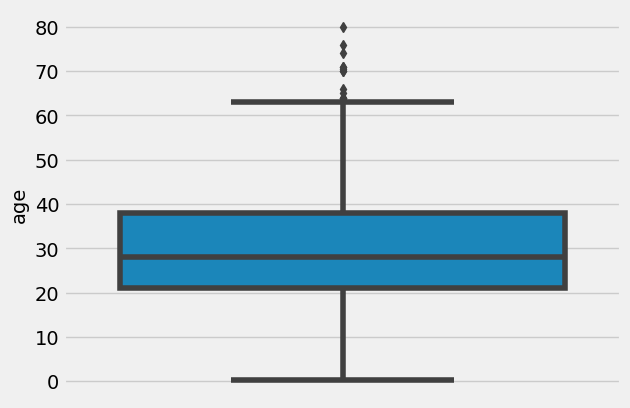

In [68]:
sns.boxplot(y=df_number['age'], data=org_train)

<Axes: xlabel='survived', ylabel='age'>

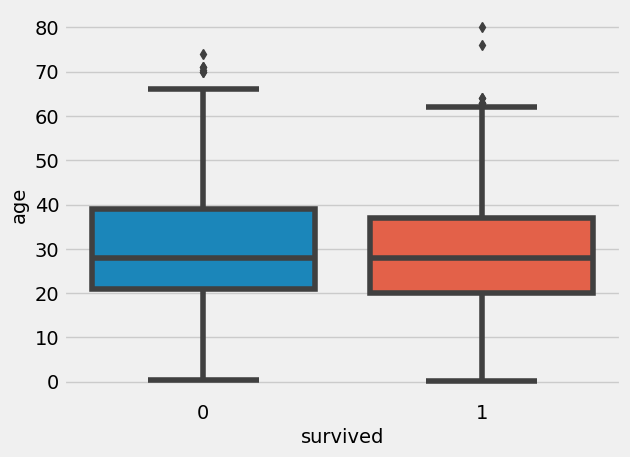

In [71]:
sns.boxplot(x=org_train['survived'], y=org_train['age'], data=org_train)

### 상관 관계 확인 - heatmap

heatmap 분석 방법  

- 주로 수치형 데이터를 분석할 때 사용한다.  


- corr() 함수는 Pearson Correlation Coefficient 를 구하는 함수  
  보통 절댓값이 0.4 이상이면 상관 관계를 갖는다고 본다.


- annot=True  
  직접적인 수치를 확인할 수 있다.
  

- mask 설정을 통해 반만 잘라서 확인할 수 있다.  


- 두 상관 관계가 높다는 것이고 서로 영향을 준다는 의미일 뿐  
  하나가 증가하면 반드시 다른 하나가 증가하는 것은 아니다.  

In [36]:
org_train.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.250455,-0.030330,0.002924,0.084269,0.224068
pclass,-0.250455,1.000000,-0.407876,0.069781,0.060049,-0.541277
age,-0.030330,-0.407876,1.000000,-0.255825,-0.169893,0.139101
sibsp,0.002924,0.069781,-0.255825,1.000000,0.386491,0.162144
parch,0.084269,0.060049,-0.169893,0.386491,1.000000,0.181826
fare,0.224068,-0.541277,0.139101,0.162144,0.181826,1.000000


<Axes: >

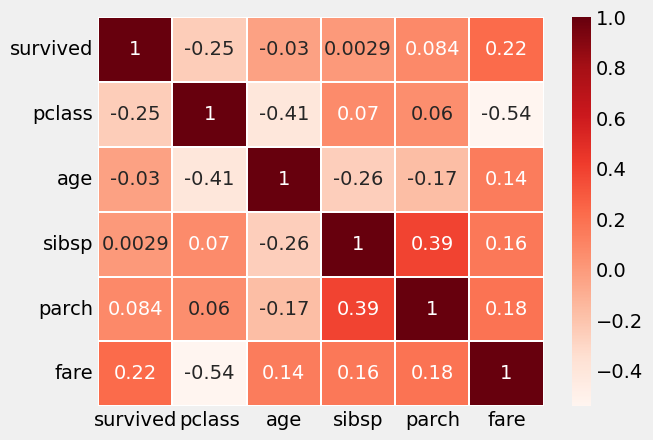

In [35]:
sns.heatmap(org_train.corr(), annot=True, linewidths=0.2, cmap = "Reds")

<Axes: >

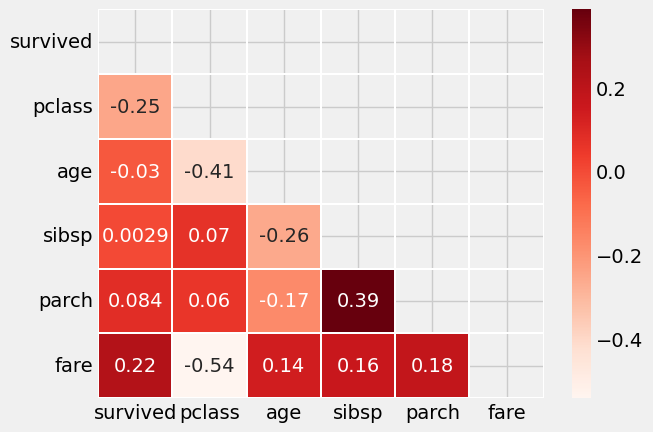

In [34]:
mask=np.zeros_like(org_train.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(org_train.corr(), annot=True, mask=mask, linewidths=0.2, cmap = "Reds")

## 범주형 데이터 분석